# **EXPLORATORY DATA ANALYSIS**

**Step 1** : Importing necessary Libraries and the data set and creating dataframe.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
apnadata = pd.read_csv('automobilepricebymileage.csv')

**Step 2** : Obtaining information on dataset.

In [ ]:
apnadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Mileage        19 non-null     int64
 1   Age(yrs)       19 non-null     int64
 2   Sell Price($)  19 non-null     int64
dtypes: int64(3)
memory usage: 584.0 bytes


**Step 3** : Checking the dimension of the given data set.

In [ ]:
apnadata.shape

(19, 3)

**Step 4** : Checking size of dataset.

In [ ]:
apnadata.size

57

**Step 5** : Understanding the variables in the data set.

In [ ]:
apnadata.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


**Step 6** : Checking for null values in dataset.

In [ ]:
apnadata.isnull().sum()

Mileage          0
Age(yrs)         0
Sell Price($)    0
dtype: int64

**Step 7** : Dropping duplicate rows and columns if any

In [ ]:
apnadata.drop_duplicates()
apnadata.shape

(19, 3)

**Step 8** : Slicing- Slicing row indexes from 5 to 10 and column indexes from 0 to 1


In [ ]:
#apnadata.iloc[row slicing, column slicing]
apnadata.iloc[5:11,0:2]

,Mileage,Age(yrs)
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6
10,83000,7


**Step 9** : Finding number of unique values in dataset

In [ ]:
apnadata['Age(yrs)'].nunique()

7

**Step 10** : Finding count of unique  values in dataset

In [ ]:
apnadata['Age(yrs)'].unique()

array([6, 3, 5, 2, 4, 8, 7])

**Step 11** : Using value_counts() method on Mileage and age to identify the count of each category in that column

In [ ]:
apnadata['Mileage'].value_counts()

69000    2
59000    2
67000    1
28000    1
25400    1
82450    1
58780    1
79000    1
83000    1
91000    1
35000    1
72000    1
52000    1
46000    1
22500    1
57000    1
87600    1
Name: Mileage, dtype: int64

In [ ]:
apnadata['Age(yrs)'].value_counts()

5    5
6    3
7    3
3    2
2    2
4    2
8    2
Name: Age(yrs), dtype: int64

# **VISUALIZATIONS**

Number of automobiles for each corresponding age

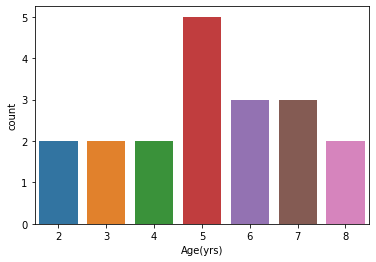

In [ ]:
sb.countplot(x='Age(yrs)',data=apnadata)

Mileage of automobile Vs its Selling price

Text(0.5, 1.0, 'Mileage Vs Selling Price')

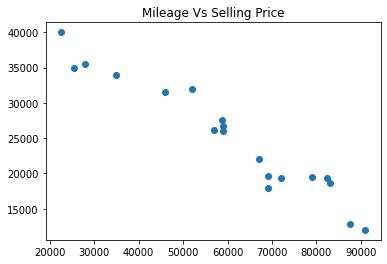

In [ ]:
plt.scatter(apnadata['Mileage'],apnadata['Sell Price($)'])
plt.title("Mileage Vs Selling Price")

Age of automobile Vs Selling Price

Text(0.5, 1.0, 'Age of automobile Vs Selling Price')

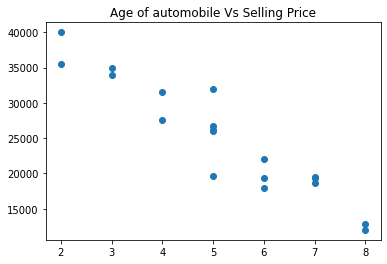

In [ ]:
plt.scatter(apnadata['Age(yrs)'],apnadata['Sell Price($)'])
plt.title("Age of automobile Vs Selling Price")

*Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Selling Price) and independant variables (i.e. age and mileage)*

*The approach we are going to use here is to split available data in two sets*

*1.Training: We will train our model on this dataset*

*2.Testing: We will use this subset to make actual predictions using trained model*

# **APPLYING REGRESSION**

**Step 1** : Splitting the data set into input and output.

In [ ]:
x = apnadata[['Mileage','Age(yrs)']]
y = apnadata['Sell Price($)']

**Step 2** : Splitting the data set into training and testing data set.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
x_train

,Mileage,Age(yrs)
8,91000,8
17,69000,5
18,87600,8
10,83000,7
4,46000,4
7,72000,6
5,59000,5
6,52000,5
11,79000,7
16,28000,2


In [ ]:
x_test

,Mileage,Age(yrs)
1,35000,3
13,58780,4
0,69000,6
3,22500,2
2,57000,5
12,59000,5


In [ ]:
y_train

8     12000
17    19700
18    12800
10    18700
4     31500
7     19300
5     26750
6     32000
11    19500
16    35500
9     22000
15    35000
14    19400
Name: Sell Price($), dtype: int64

In [ ]:
y_test

1     34000
13    27500
0     18000
3     40000
2     26100
12    26000
Name: Sell Price($), dtype: int64

**Step 3** : Applying a regressor model on training set.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

**Step 4** : To Fit the model(Mapping/Plotting of Inputs with the Outputs)

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

**Step 5** : Predicting the output.

In [ ]:
model.predict(x_test)


array([33900.28281421, 25013.44107011, 21890.08696084, 38361.42248562,
       26155.05189498, 25370.35294593])

**Step 6** : Calculating the accuracy of the model

In [ ]:
model.score(x_test,y_test)

0.9145603157635419

Therefore, the accuracy of our model is 91%.